In [1]:
import numpy as np

from sigvisa import Sigvisa
from sigvisa.source.event import get_event
from sigvisa.infer.coarse_to_fine_init import ModelSpec, EventRunSpec, TimeRangeRunSpec, do_coarse_to_fine, initialize_from, do_inference, initialize_sg
from sigvisa.graph.sigvisa_graph import SigvisaGraph
from sigvisa.treegp.gp import GPCov
from sigvisa.graph.region import Region

import os, sys, traceback
import cPickle as pickle

%matplotlib inline
import matplotlib.pylab as plt

from sigvisa.models.ttime import tt_predict
from sigvisa.utils.array import time_to_index, index_to_time

from sigvisa.infer.correlations.ar_correlation_model import ar_advantage

In [2]:
with open("/home/dmoore/python/sigvisa/logs/mcmc/01392/step_000303/pickle.sg", 'rb') as f:
    sg = pickle.load(f)

In [3]:
sg.current_log_p()

pv wave_ELK_BHZ_freq_0.8_4.5_1203605151.1 changed set([]) skip tssm False
pv wave_ELK_BHZ_freq_0.8_4.5_1203620110.6 changed set([]) skip tssm False
pv wave_ELK_BHZ_freq_0.8_4.5_1203605151.1 changed set([]) skip tssm False
pv wave_ELK_BHZ_freq_0.8_4.5_1203620110.6 changed set([]) skip tssm False


/home/dmoore/python/sigvisa/models/signal_model.py:643: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return TransientCombinedSSM(components, TSSM_NOISE_PADDING)


matrix([[-21350.38682066]])

In [4]:
wn1 = sg.station_waves["ELK"][0]
wn2 = sg.station_waves["ELK"][1]
#sg.current_log_p()

In [5]:
pv = wn2._parent_values()
print wn2.tssm_components[8][3]

pv wave_ELK_BHZ_freq_0.8_4.5_1203620110.6 changed set([]) skip tssm False
556


In [6]:
tmnodes2 = sg.get_template_nodes(2, wn2.sta, "Lg", wn2.band, wn2.chan)
n_ttr = tmnodes2["tt_residual"][1]
print n_ttr.get_value()
n_ttr.set_value(-0.92)
#sg.current_log_p()

-1.61791993307


In [7]:
#print wn2.pass_jointgp_messages()
print sg.current_log_p()
#print wn2.upwards_message_normalizer()
print wn2.parent_keys_changed

pv wave_ELK_BHZ_freq_0.8_4.5_1203605151.1 changed set([]) skip tssm False
pv wave_ELK_BHZ_freq_0.8_4.5_1203620110.6 changed set([('2;Lg;ELK;:;:;arrival_time', <NODE 2;Lg;ELK;:;:;arrival_time>)]) skip tssm False
pv wave_ELK_BHZ_freq_0.8_4.5_1203605151.1 changed set([]) skip tssm False
pv wave_ELK_BHZ_freq_0.8_4.5_1203620110.6 changed set([]) skip tssm False
[[-21365.33711704]]
set([])


In [8]:
#pv = wn2._parent_values()
print wn2.tssm_components[8][3]

563


pv wave_ELK_BHZ_freq_0.8_4.5_1203605151.1 changed set([]) skip tssm False
pv wave_ELK_BHZ_freq_0.8_4.5_1203620110.6 changed set([]) skip tssm False
0.612679645853


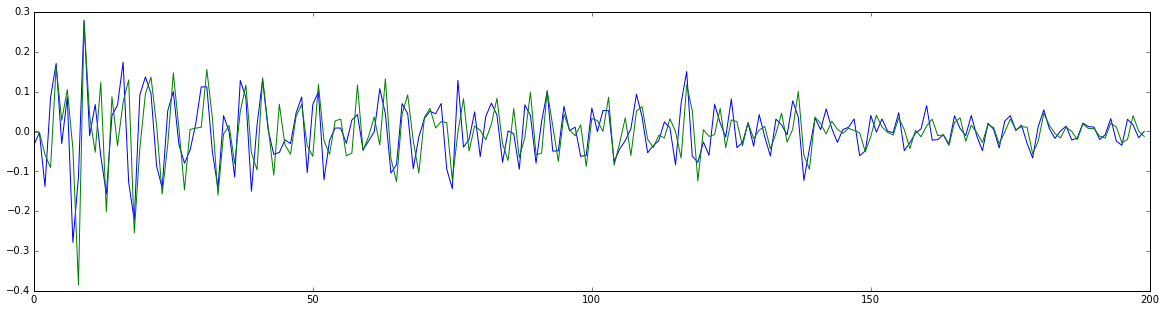

In [9]:
s1 = wn1.get_arrival_signal(1, "Lg", length=20.0)
s2 = wn2.get_arrival_signal(2, "Lg", length=20.0)
s1n = s1 / np.linalg.norm(s1)
s2n = s2 / np.linalg.norm(s2)

plt.figure(figsize=(20, 5))
plt.plot(s1n)
plt.plot(s2n)

print np.dot(s1n, s2n)

0.562803255704


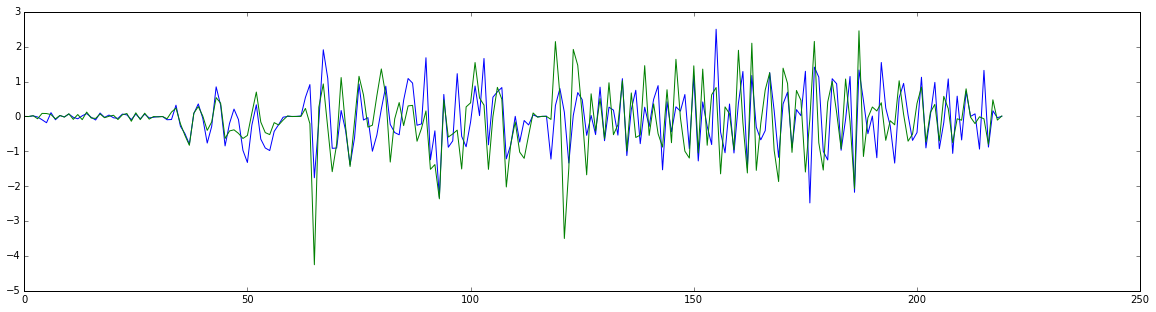

In [10]:
w1m, w1v = wn1.extract_wavelet_posterior(1, "Lg")
w2m, w2v = wn2.extract_wavelet_posterior(2, "Lg")

plt.figure(figsize=(20, 5))
plt.plot(w1m)
plt.plot(w2m)

print np.dot(w1m / np.linalg.norm(w1m), w2m / np.linalg.norm(w2m))

In [19]:
atime = wn2.get_template_params_for_arrival(2, "Lg")[0]["arrival_time"]
print atime
print time_to_index(atime, wn2.st, wn2.srate)

1203620166.97
563


In [24]:
pv = wn2._parent_values()
wn2.tssm = wn2.transient_ssm()
print wn2.tssm_components[8][3]

563


-0.0594749641555


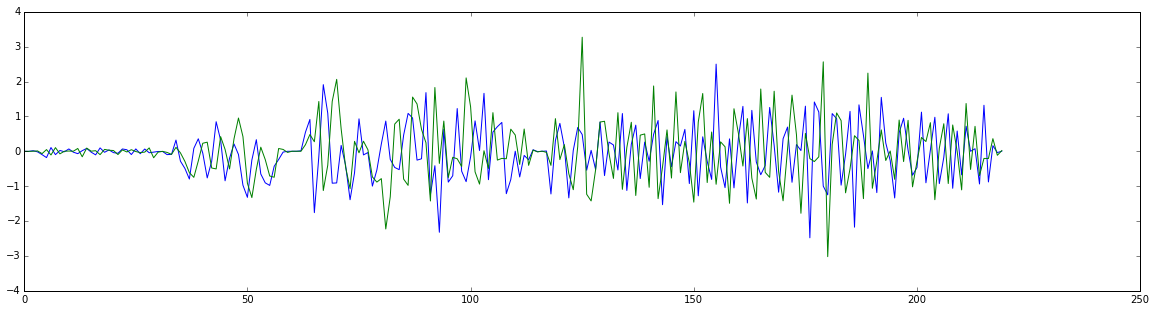

In [9]:


w1m, w1v = wn1.extract_wavelet_posterior(1, "Lg")
w2m, w2v = wn2.extract_wavelet_posterior(2, "Lg")

plt.figure(figsize=(20, 5))
plt.plot(w1m)
plt.plot(w2m)

print np.dot(w1m / np.linalg.norm(w1m), w2m / np.linalg.norm(w2m))

plotting uatemplate -4 as color (0.0, 0.19019607843137254, 1.0, 1.0)
plotting uatemplate -1 as color (0.0, 0.84901960784313724, 1.0, 1.0)
reading station detections... 


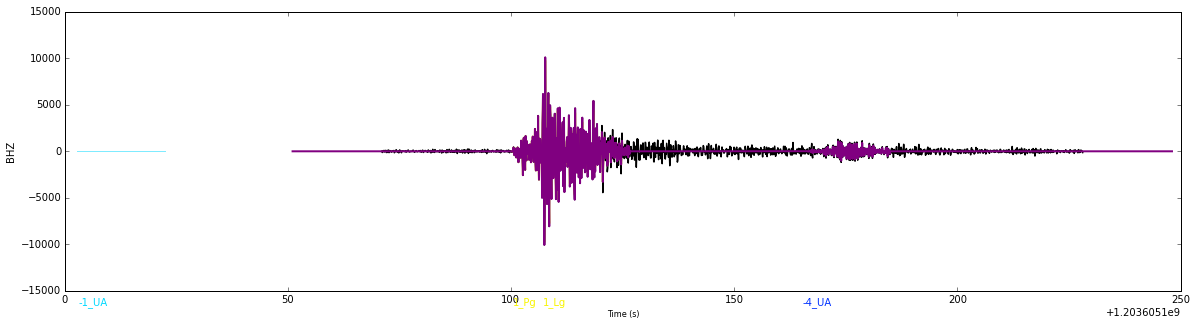

In [7]:
f = plt.figure(figsize=(20, 5))
ax = f.add_subplot(111)
wn1.plot(ax)

# Current alignment from wave node

# Current alignment in template xc move

# Proposed alignment in template xc move

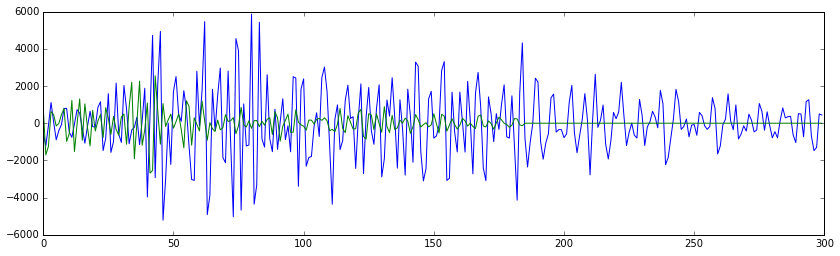

In [31]:
n_atime.set_value(proposed_atime)

wn._parent_values()

pred_full = wn.tssm.mean_obs(wn.npts)
actual_full = wn.get_value()

plt.figure(figsize=(14, 4))
lg_idx = time_to_index(pred_atime-5.0, wn.st, wn.srate)
plt.plot(actual_full[lg_idx:lg_idx + 300])
plt.plot(pred_full[lg_idx:lg_idx + 300])


In [40]:
for (eeid, pphase, scale, sidx, npts, component_type) in wn.tssm_components:
    if eeid != eid or pphase != phase: continue
    if component_type != "wavelet": continue
    print sidx, npts

807 200


In [42]:
print 807-relevant_sidx

181


In [44]:
print backwards_idx

180


In [48]:
print time_to_index(relevant_stime, wn.st, wn.srate)
print relevant_sidx

626
626


In [51]:
#time_to_index(current_atime, wn.st, wn.srate)

print (current_atime - wn.st) * wn.srate

print (current_atime - relevant_stime) * wn.srate


807.311899662
180.826158524
